# Predict Adult Salary with Logistic Regression

In [15]:
#install.packages("Amelia", repos='http://cran.us.r-project.org')

In [17]:
library(dplyr)
library(ggplot2)

In [3]:
adult <- read.csv('adult_sal.csv')
head(adult) #index is being repeated so drop one column
adult <-select(adult, -X)
head(adult)
str(adult)
summary(adult)

X,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 9 levels "?","Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation   : Factor w/ 15 levels "?","Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40

      age                 type_employer       fnlwgt       
 Min.   :17.00   Private         :22696   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00   Local-gov       : 2093   Median : 178356  
 Mean   :38.58   ?               : 1836   Mean   : 189778  
 3rd Qu.:48.00   State-gov       : 1298   3rd Qu.: 237051  
 Max.   :90.00   Self-emp-inc    : 1116   Max.   :1484705  
                 (Other)         :  981                    
        education     education_num                    marital     
 HS-grad     :10501   Min.   : 1.00   Divorced             : 4443  
 Some-college: 7291   1st Qu.: 9.00   Married-AF-spouse    :   23  
 Bachelors   : 5355   Median :10.00   Married-civ-spouse   :14976  
 Masters     : 1723   Mean   :10.08   Married-spouse-absent:  418  
 Assoc-voc   : 1382   3rd Qu.:12.00   Never-married        :10683  
 11th        : 1175   Max.   :16.00   Separated            : 1025  
 (Other)     : 5134                   Widowe

## DATA CLEANING

In [4]:
#type_employer column
table(adult$type_employer) #check frequencies of each factor of type_employer


               ?      Federal-gov        Local-gov     Never-worked 
            1836              960             2093                7 
         Private     Self-emp-inc Self-emp-not-inc        State-gov 
           22696             1116             2541             1298 
     Without-pay 
              14 

1836 null values, 2 smallest groups: without-pay and never-worked

In [5]:
#combine them into unemployed
unemp <- function(job){
  job <- as.character(job)
  if (job=='Never-worked' | job=='Without-pay'){
    return('Unemployed')
  }else{
    return(job)
  }
}
adult$type_employer <- sapply(adult$type_employer, unemp)
table(adult$type_employer)


               ?      Federal-gov        Local-gov          Private 
            1836              960             2093            22696 
    Self-emp-inc Self-emp-not-inc        State-gov       Unemployed 
            1116             2541             1298               21 

In [6]:
#combine state and local gov jobs into SL-gov
#combine self-employed jobs into self-emp
group_emp <- function(job){
  job <- as.character(job)
  if (job=='State-gov' | job=='Local-gov'){
    return('SL-gov')
  }else if (job=='Self-emp-inc' | job=='Self-emp-not-inc'){
    return('self-emp')
  }else{
    return(job)
  }
}
adult$type_employer <- sapply(adult$type_employer, group_emp)
table(adult$type_employer)


          ? Federal-gov     Private      SL-gov  Unemployed    self-emp 
       1836         960       22696        3391          21        3657 

In [7]:
#marital column
table(adult$marital)


             Divorced     Married-AF-spouse    Married-civ-spouse 
                 4443                    23                 14976 
Married-spouse-absent         Never-married             Separated 
                  418                 10683                  1025 
              Widowed 
                  993 

In [8]:
#reduce features to married, not-married, never-married
group_marital <- function(m){
  m <- as.character(m)
  if (m=='Married-AF-spouse' | m=='Married-civ-spouse' | m=='Married-spouse-absent'){
    return('married')
  }else if (m=='Divorced' | m=='Separated' | m=='Widowed'){
    return('not-married')
  }else{
    return(m)
  }
}
adult$marital <- sapply(adult$marital, group_marital)
table(adult$marital)


Never-married       married   not-married 
        10683         15417          6461 

In [9]:
#country column
table(adult$country)
levels(adult$country) #show all countries


                         ?                   Cambodia 
                       583                         19 
                    Canada                      China 
                       121                         75 
                  Columbia                       Cuba 
                        59                         95 
        Dominican-Republic                    Ecuador 
                        70                         28 
               El-Salvador                    England 
                       106                         90 
                    France                    Germany 
                        29                        137 
                    Greece                  Guatemala 
                        29                         64 
                     Haiti         Holand-Netherlands 
                        44                          1 
                  Honduras                       Hong 
                        13                         20 
         

[1] "?"                          "Cambodia"                  
 [3] "Canada"                     "China"                     
 [5] "Columbia"                   "Cuba"                      
 [7] "Dominican-Republic"         "Ecuador"                   
 [9] "El-Salvador"                "England"                   
[11] "France"                     "Germany"                   
[13] "Greece"                     "Guatemala"                 
[15] "Haiti"                      "Holand-Netherlands"        
[17] "Honduras"                   "Hong"                      
[19] "Hungary"                    "India"                     
[21] "Iran"                       "Ireland"                   
[23] "Italy"                      "Jamaica"                   
[25] "Japan"                      "Laos"                      
[27] "Mexico"                     "Nicaragua"                 
[29] "Outlying-US(Guam-USVI-etc)" "Peru"                      
[31] "Philippines"                "Poland"                    
[33] "Portugal"                   "Puerto-Rico"               
[35] "Scotland"                   "South"                     
[37] "Taiwan"                     "Thailand"                  
[39] "Trinadad&Tobago"            "United-States"             
[41] "Vietnam"                    "Yugoslavia"

In [10]:
#group by continent
Asia <- c('Cambodia', 'China', 'Hong', 'India', 'Iran', 'Japan', 'Laos', 'Philippines', 'Vietnam', 'Taiwan', 'Thailand')
N_America <- c('Canada', 'United-States', 'Puerto-Rico')
Europe <- c('England' ,'France', 'Germany' ,'Greece','Holand-Netherlands','Hungary',
            'Ireland','Italy','Poland','Portugal','Scotland','Yugoslavia')

Latin_S_America <- c('Columbia','Cuba','Dominican-Republic','Ecuador',
                     'El-Salvador','Guatemala','Haiti','Honduras',
                     'Mexico','Nicaragua','Outlying-US(Guam-USVI-etc)','Peru',
                     'Jamaica','Trinadad&Tobago')
Other <- c('South')

In [11]:
group_country <- function(country){
  country <- as.character(country)
  if (country %in% Asia){
    return('Asia')
  }else if (country %in% N_America){
    return('North_America')
  }else if (country %in% Latin_S_America){
    return('Latin_and_South_America')
  }else if (country %in% Europe){
    return('Europe')
  }else{
    return('Other')
  }
}
adult$country <- sapply(adult$country, group_country)
table(adult$country)
str(adult)


                   Asia                  Europe Latin_and_South_America 
                    671                     521                    1301 
          North_America                   Other 
                  29405                     663 

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: chr  "SL-gov" "self-emp" "Private" "Private" ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : chr  "Never-married" "married" "not-married" "married" ...
 $ occupation   : Factor w/ 15 levels "?","Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ country      : 

In [12]:
#change back the strings to factors
adult$marital <-factor(adult$marital)
adult$type_employer <-factor(adult$type_employer)
adult$country <-factor(adult$country)

## DEAL WITH MISSING DATA

In [19]:
library(Amelia)
adult[adult == '?'] <- NA
table(adult$type_employer)


          ? Federal-gov     Private      SL-gov  Unemployed    self-emp 
          0         960       22696        3391          21        3657 

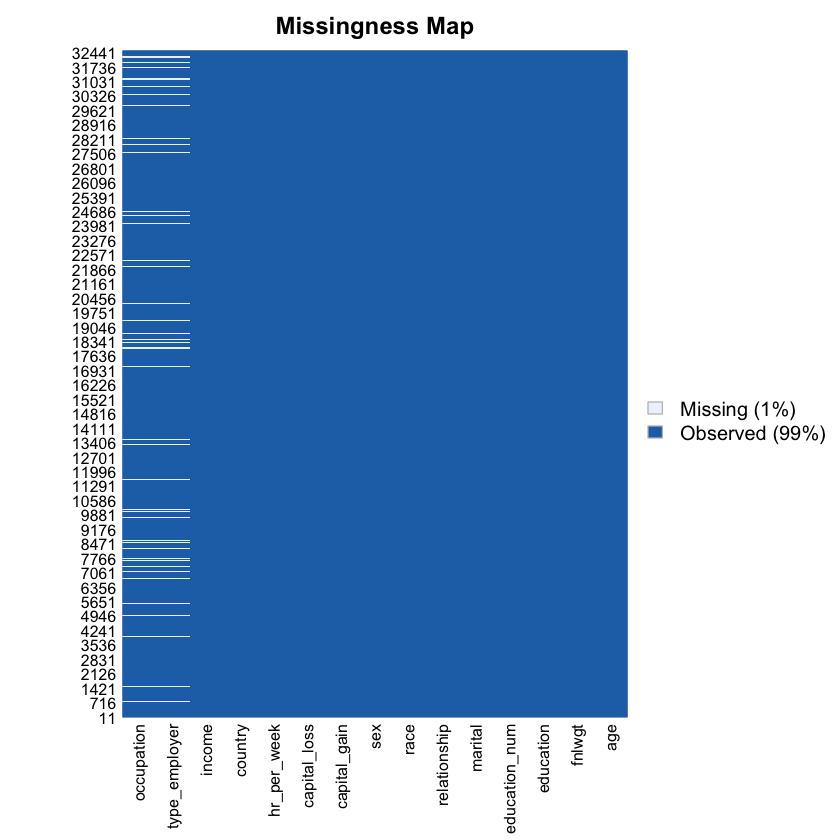

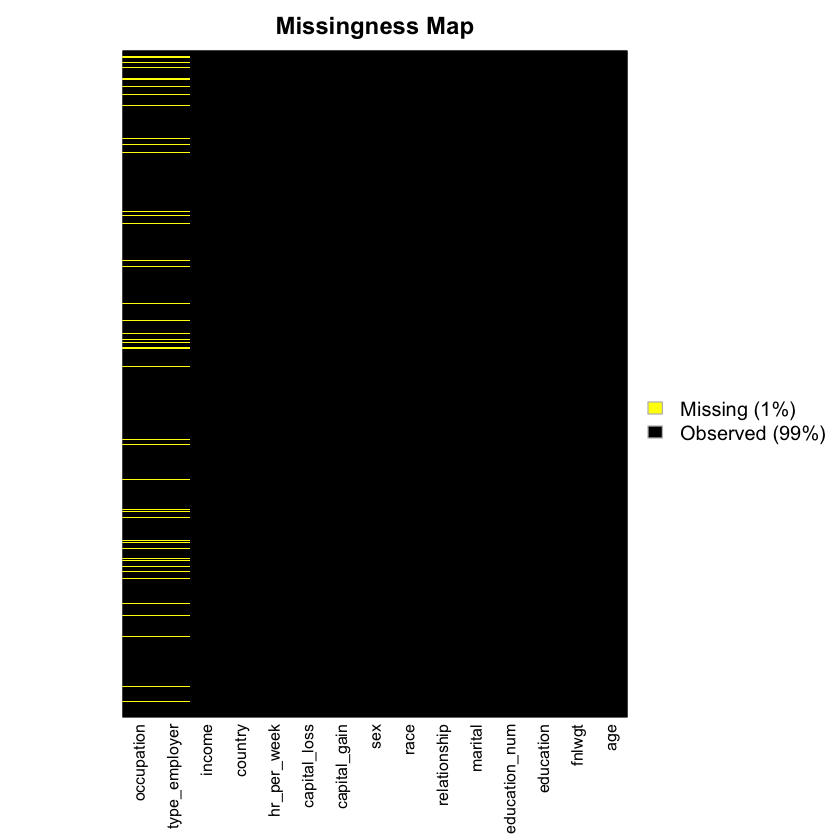

In [20]:
missmap(adult)
missmap(adult,y.at=c(1),y.labels = c(''),col=c('yellow','black'))

Can't impute avergage for occupation and type_employer because they are categorical so we're just gonna drop NA values

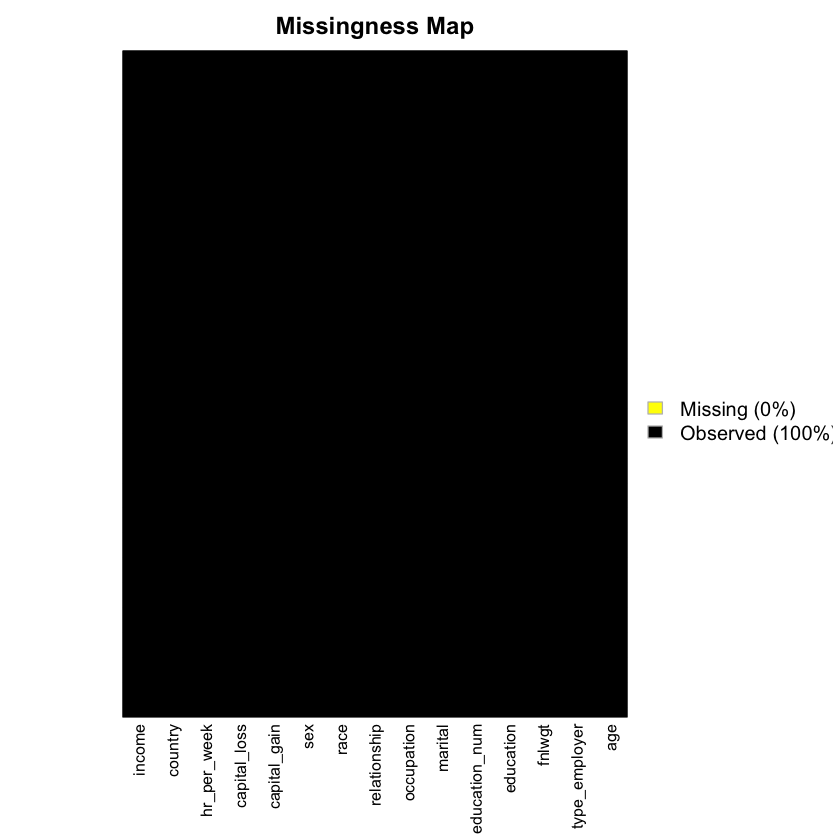

In [21]:
adult <- na.omit(adult)
missmap(adult,y.at=c(1),y.labels = c(''),col=c('yellow','black')) #NA is gone

## EDA: VISUALIZATION

### Histogram of ages, colored by income

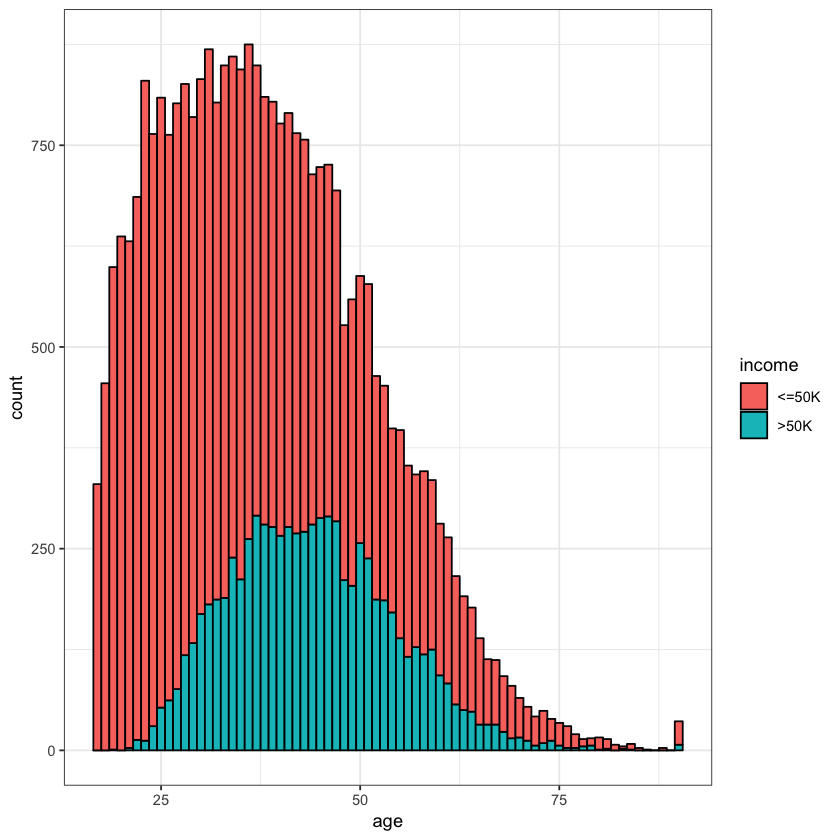

In [24]:
ggplot(adult, aes(age)) + geom_histogram(aes(fill=income), color='black', binwidth = 1) + theme_bw()

### Histogram of hours worked per week

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


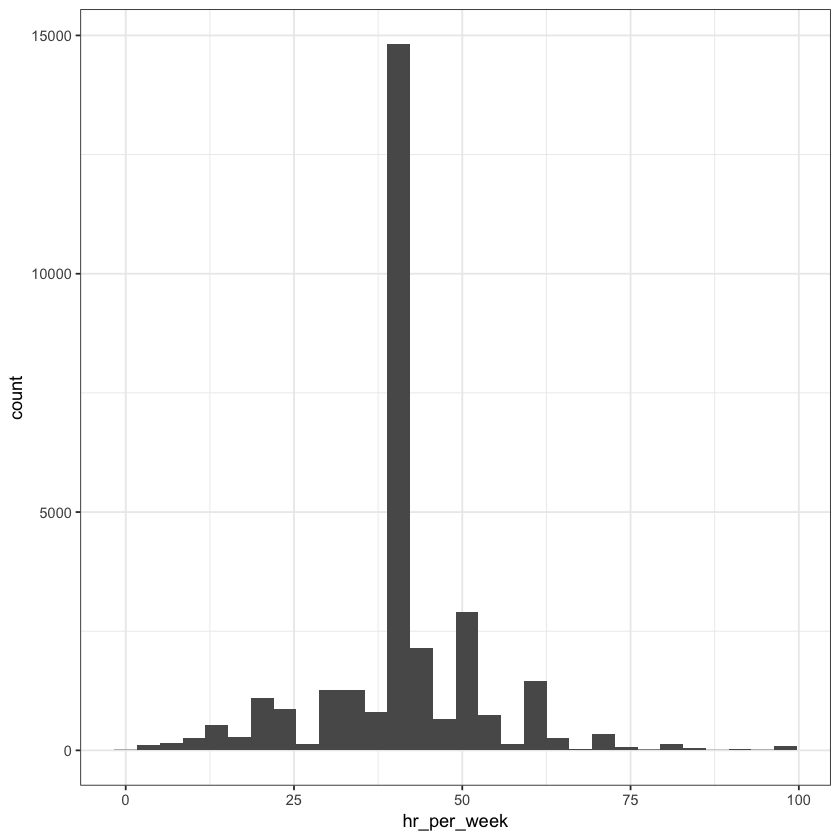

In [25]:
ggplot(adult, aes(hr_per_week)) + geom_histogram() + theme_bw()

a lot of 40 hours/week

### Bar plot of region with the fill color defined by income class

age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region,income
39,SL-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North_America,<=50K
50,self-emp,83311,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,13,North_America,<=50K
38,Private,215646,HS-grad,9,not-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North_America,<=50K
53,Private,234721,11th,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,North_America,<=50K
28,Private,338409,Bachelors,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Latin_and_South_America,<=50K
37,Private,284582,Masters,14,married,Exec-managerial,Wife,White,Female,0,0,40,North_America,<=50K


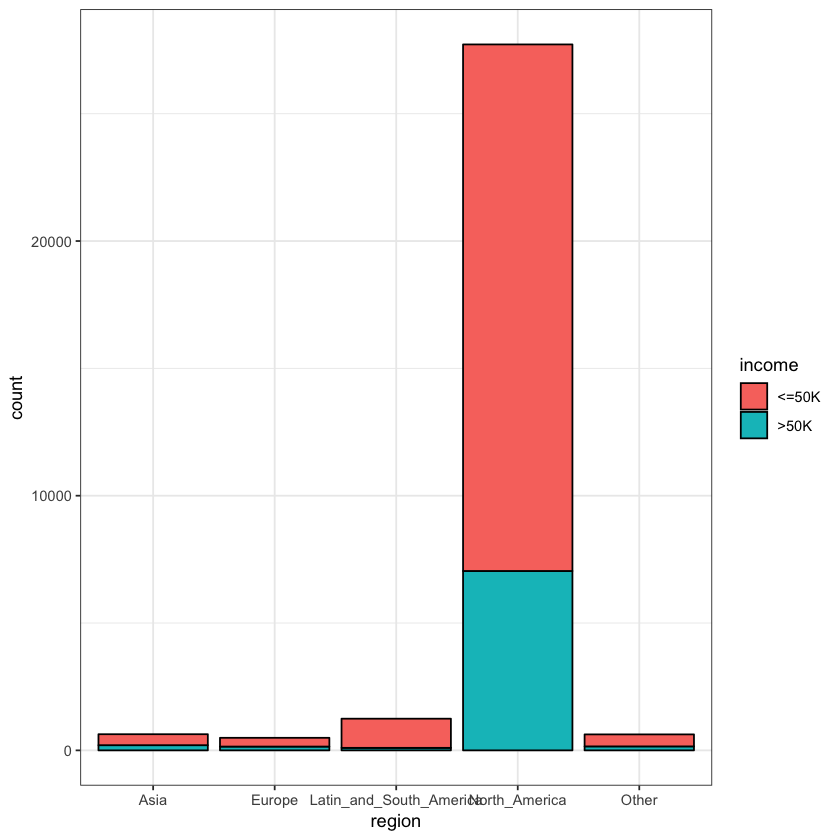

In [26]:
#rename the country columnn to region column to better reflect factor levels
#names(adult)[names(adult)=="country"] <- "region"
adult <- rename(adult, region = country)
head(adult)
ggplot(adult, aes(region)) + geom_bar(aes(fill=income), color='black') + theme_bw()

## BUILDING A MODEL 
To predict if adult is above or below 50k in salary

### Train Test Split

In [27]:
head(adult)
library(caTools)
set.seed(101)
split <- sample.split(adult$income, SplitRatio = 0.7)
train <- subset(adult, split == TRUE)
test <- subset(adult, split == FALSE)

age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region,income
39,SL-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North_America,<=50K
50,self-emp,83311,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,13,North_America,<=50K
38,Private,215646,HS-grad,9,not-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North_America,<=50K
53,Private,234721,11th,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,North_America,<=50K
28,Private,338409,Bachelors,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Latin_and_South_America,<=50K
37,Private,284582,Masters,14,married,Exec-managerial,Wife,White,Female,0,0,40,North_America,<=50K


### Training the Model

In [28]:
#help(glm)
log_model <- glm(income~. , family=binomial(link = 'logit'), data=train)
summary(log_model)
#help(step)
new_model <- step(log_model)
summary(new_model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = income ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1163  -0.5172  -0.1965   0.0000   3.6235  

Coefficients: (1 not defined because of singularities)
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -6.745e+00  4.785e-01 -14.096  < 2e-16 ***
age                            2.534e-02  2.007e-03  12.627  < 2e-16 ***
type_employerPrivate          -4.464e-01  1.125e-01  -3.966 7.30e-05 ***
type_employerSL-gov           -6.835e-01  1.266e-01  -5.399 6.71e-08 ***
type_employerUnemployed       -1.414e+01  3.688e+02  -0.038  0.96941    
type_employerself-emp         -6.760e-01  1.244e-01  -5.434 5.52e-08 ***
fnlwgt                         5.424e-07  2.085e-07   2.601  0.00929 ** 
education11th                  2.094e-01  2.570e-01   0.814  0.41538    
education12th                  3.925e-01  3.410e-01   1.151  0.24961    
education1st-

Start:  AIC=14112.05
income ~ age + type_employer + fnlwgt + education + education_num + 
    marital + occupation + relationship + race + sex + capital_gain + 
    capital_loss + hr_per_week + region



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess


Step:  AIC=14112.05
income ~ age + type_employer + fnlwgt + education + marital + 
    occupation + relationship + race + sex + capital_gain + capital_loss + 
    hr_per_week + region



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                Df Deviance   AIC
<none>                14004 14112
- fnlwgt         1    14011 14117
- race           4    14019 14119
- region         4    14026 14126
- type_employer  4    14050 14150
- marital        2    14060 14164
- sex            1    14097 14203
- age            1    14165 14271
- capital_loss   1    14217 14323
- hr_per_week    1    14222 14328
- relationship   5    14288 14386
- occupation    13    14444 14526
- education     15    14718 14796
- capital_gain   1    15248 15354



Call:
glm(formula = income ~ age + type_employer + fnlwgt + education + 
    marital + occupation + relationship + race + sex + capital_gain + 
    capital_loss + hr_per_week + region, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1163  -0.5172  -0.1965   0.0000   3.6235  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -6.745e+00  4.785e-01 -14.096  < 2e-16 ***
age                            2.534e-02  2.007e-03  12.627  < 2e-16 ***
type_employerPrivate          -4.464e-01  1.125e-01  -3.966 7.30e-05 ***
type_employerSL-gov           -6.835e-01  1.266e-01  -5.399 6.71e-08 ***
type_employerUnemployed       -1.414e+01  3.688e+02  -0.038  0.96941    
type_employerself-emp         -6.760e-01  1.244e-01  -5.434 5.52e-08 ***
fnlwgt                         5.424e-07  2.085e-07   2.601  0.00929 ** 
education11th                  2.094e-01  2.570

### Testing

In [29]:
#confusion matrix
test$predicted_income = predict(log_model, newdata=test, type="response")
table(test$income, test$predicted_income > 0.5 )

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”

       
        FALSE TRUE
  <=50K  6372  548
  >50K    872 1423

In [35]:
#accuracy: (TP+TN)/ALL
acc <- (6372+1423)/(6372+1423+548+872)
print("accuracy: ")
print(acc)
#recall
print("recall: ")
6732/(6372+548)
#precision
print("precision: ")
6732/(6372+872)

[1] "accuracy: "
[1] 0.8459034
[1] "recall: "


[1] 0.9728324

[1] "precision: "


[1] 0.9293208